## UNIX時間日期轉換

In [1]:
import time
import datetime

def datetime_to_unix_ts(query_date):
    '''date format:dd/mm/yyyy'''
    response_ts = time.mktime(datetime.datetime.strptime(query_date, "%d/%m/%Y").timetuple())
    return response_ts
def unix_ts_to_datetime(query_ts):
    '''expect query_ts in seconds'''
    response_date = datetime.datetime.fromtimestamp(query_ts)
    return response_date

In [3]:
query_date = "01/07/2020"
print(datetime_to_unix_ts(query_date))

query_ts = 1593532800.0
print(unix_ts_to_datetime(query_ts))

1593532800.0
2020-07-01 00:00:00


## Coin Gecko API

In [5]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 10862.34}}

In [6]:
# parameter: coin_id, vs_currency, from_timestamp, to_timestamp
btc_history = cg.get_coin_market_chart_range_by_id('bitcoin', 'usd', datetime_to_unix_ts("01/07/2020"), datetime_to_unix_ts("01/08/2020"))

In [7]:
for i in btc_history['prices']:
    print(unix_ts_to_datetime(i[0]/1000), i[1])

2020-07-01 00:06:26.584000 9169.296214050039
2020-07-01 01:01:51.507000 9162.411969578881
2020-07-01 02:01:29.809000 9144.108578185893
2020-07-01 03:02:31.263000 9133.312448768944
2020-07-01 04:03:12.045000 9147.441894818254
2020-07-01 05:00:59.832000 9150.51985706789
2020-07-01 06:04:47.115000 9163.572002047678
2020-07-01 07:01:14.076000 9133.03221271472
2020-07-01 08:07:15.228000 9111.722077644024
2020-07-01 09:06:52.777000 9123.69964849764
2020-07-01 10:01:25.480000 9127.945420111662
2020-07-01 11:01:54.950000 9137.096527669753
2020-07-01 12:04:13.863000 9139.648711945112
2020-07-01 13:02:26.271000 9151.407117547797
2020-07-01 14:04:58.172000 9145.550486904
2020-07-01 15:02:09.879000 9142.452707176355
2020-07-01 16:00:26.342000 9142.314918171807
2020-07-01 17:07:54.264000 9179.932370445362
2020-07-01 18:03:57.296000 9160.025578540695
2020-07-01 19:04:45.412000 9154.73637217491
2020-07-01 20:03:19.002000 9159.191325854688
2020-07-01 21:03:41.956000 9155.362228416474
2020-07-01 22:02:

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters(datetime)

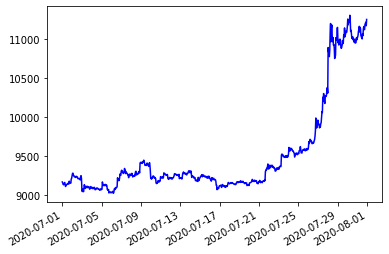

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

dates_ = [unix_ts_to_datetime(i[0]/1000) for i in btc_history['prices']]
values = [i[1] for i in btc_history['prices']]
dates = matplotlib.dates.date2num(dates_)
plt.plot_date(dates, values,'b-')
plt.gcf().autofmt_xdate()

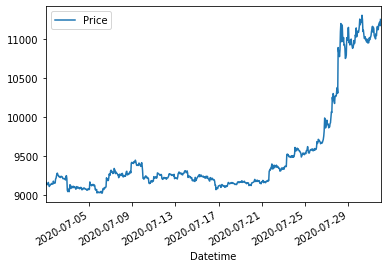

In [18]:
df = pd.DataFrame({'Datetime':dates_,'Price':values})
# df
df.plot(x="Datetime",y="Price")
